In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

#plotting modules
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots # utility for configuring figure with multiple plots
import torch

In [2]:
def initial_condition(x0,k0):
    """
    """
    return ((2/np.pi())**.25)*np.exp(-np.square(x0)+1j*k0*x0)

In [3]:
#define spacing and x,t arrays
dx=1
dt=10
xi=-10
xF = 10
t0 = 0
tF = 200
nsteps=int(tF/dt)+1
x0=np.linspace(-10,10,100)
t=np.linspace(t0,tF,nsteps)
print(len(t))

# Define empty matrix where we hold x
x_mat = []

# Create the tridiagonal matrix
gamma   = -1j*(dt/dx**2)
B       = np.zeros(len(x0), dtype=complex)
B[0]    = 1
B[-1]   = 1
B[1:-1] = (1-gamma)
u = np.zeros(len(x0)-1, dtype=complex)
u[0] = 0
u[-1] = .5*gamma
u[1:-1] = (.5*gamma)
L       = np.zeros(len(x0)-1, dtype=complex)
L[0]    = .5*gamma
L[-1]   = 0
L[1:-1] = (.5*gamma)
# Create the tridiagonal matrix
A = np.diag(B, 0) + np.diag(u, 1) + np.diag(L, -1)

21


In [4]:
# psi = []
# psi0 = initial_condition(x0, 5)
# psi.append(psi0)



In [5]:
#define psi at t=0
k0=5
psi=[]

for i in range(len(x0)):
    psi0=(2/(math.pi)**.25)*np.exp(-np.square(x0[i])+1j*k0*x0[i])
    # psi0=(2/(math.pi)**.25)*np.exp(-np.square(x0[i]))
    psi.append(psi0)
# print(psi)

x_mat=[]

for i in range(len(t)):
    # print(i)
    # print(psi[i])
    psi = np.linalg.solve(A, psi)
    x_mat.append(psi)

# print(x_mat)
# print(len(x_mat))

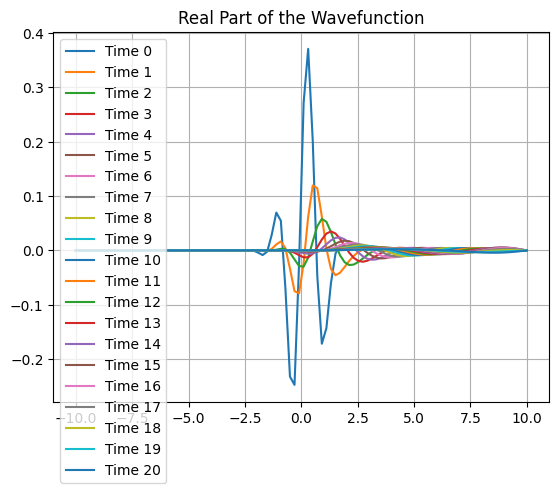

In [6]:
plt.figure()
for i in range(len(t)):
    #if i % 100 == 0:
    plt.plot(x0, np.real(x_mat[i]), label="Time {}".format(i))
    # plt.plot(x0, np.real(psi[i]), label="Time {}".format(i))
plt.title("Real Part of the Wavefunction")
plt.legend(loc="upper left")
plt.grid()
plt.show()

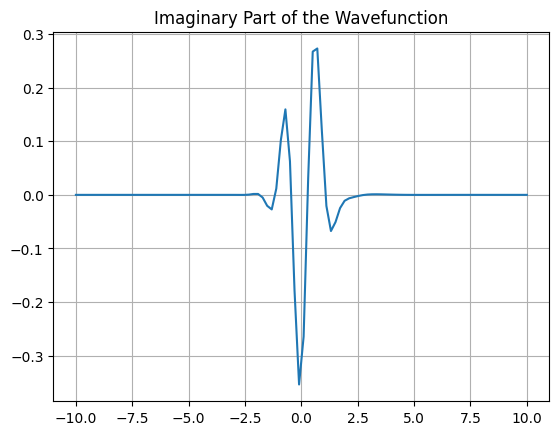

In [7]:
plt.figure()
for i in range(len(t)):
    if i % 100 == 0:
        plt.plot(x0, np.imag(x_mat[i]), label="Time {}".format(i))
    # plt.plot(x0, np.imag(psi[i]), label="Time {}".format(i))
plt.title("Imaginary Part of the Wavefunction")
plt.grid()
plt.show()

In [8]:
# Plot the norm of the wavefunction
# plt.figure()
for i in range(len(t)):
    if i % 100 == 0:
        print(np.linalg.norm(psi[i]))

1.829591166069289e-20


Animation Attempts      

In [9]:
def animation():

  # Create the figure
  layout = go.Layout(width=600,height=600,title="Traveling and Dispersing!")
  fig = go.Figure(layout=layout)

  #Add the initial scatter plot (first time step)

  fig.add_trace(go.Scatter(x=x0, y=np.real(x_mat[0]), mode='lines', line=dict(shape='spline', smoothing=1.3)
  ))

  # Create frames for each time step
  frames = []
  for packet in range(0,nsteps):
    frame_data= go.Scatter(x=x0,y=np.real(x_mat[packet]),mode='lines',line=dict(shape='spline', smoothing=1.3))
    frames.append(go.Frame(data=frame_data, name=f'frame{packet}'))
  #print(frames)
  fig.frames = frames

  print("num frames: ",len(frames))
  # # give the frames to the figure
  fig.frames = frames

  # we add widgets using the layout options
  # Add animation buttons
  # Add slider and play button
  fig.update_layout(
      updatemenus=[
          dict(
              type="buttons",
              buttons=[dict(label="Play",
                            method="animate",
                            args=[None, {"frame": {"duration": 80, "redraw": True},
                                          "fromcurrent": True, "transition": {"duration": 15,
                                                                              "easing": "linear"}}]),
                    dict(label="Pause",
                            method="animate",
                            args=[[None], {"frame": {"duration": 0, "redraw": False},
                                          "mode": "immediate",
                                          "transition": {"duration": 0}}])
                    ],
              # Adjust button position and direction
              direction="left",
              pad={"r": 10, "t": 87},
              showactive=False,
              x=0.1,
              xanchor="right",
              y=0,
              yanchor="top"
          ),
      ],
      sliders = [dict(
          active=0,
          yanchor="top",
          xanchor="left",
          currentvalue={"prefix":"Time: ","suffix":" s"},
          pad={"b": 10, "t": 50},
          len=0.9,
          x=0.1,
          y=0,
          steps = [{
              "method": "animate",
              "args": [[f'frame{k}'], # The name of the corresponding frame
                      {"frame": {"duration": 1, "redraw": True},
                        "mode": "immediate",
                        "transition": {"duration": 0}}
                      ],
              "label": k # The label that will appear on the slider
          } for k in range(nsteps)]
      )]
  )

  # Update initial layout
  # fig.update_layout(
  #     scene=dict(
  #         xaxis=dict(autorange=True),
  #         yaxis=dict(range=[-.2, .2],autorange=False),
  #         aspectratio=dict(x=1, y=1)
  #     )
  # )
  fig.update_layout(scene=dict(
          xaxis=dict(autorange=np.True_),
          yaxis=dict(autorange=True),
          aspectratio=dict(x=1, y=1)
      ))

  return fig

In [10]:
fig_animation = animation()
fig_animation.show()

num frames:  21
